#### Identitas:

In [1]:
print('NAMA:')
print('Muhamad Adam')
print('NIM:')
print('41521110006')

NAMA:
Muhamad Adam
NIM:
41521110006


#### Lakukan 11 instruksi di bawah ini dengan menggunakan dataset berikut:
Catatan: Anda bebas menambah/mengedit kode dalam melakukan instruksi.

In [2]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading datasets

path = 'bank-train.csv' #sesuaikan dengan path masing-masing
df = pd.read_csv(path)

print(df)

          id  age          job   marital            education  default  \
0      12556   40  blue-collar   married             basic.9y  unknown   
1      35451   31       admin.   married    university.degree       no   
2      30592   59      retired   married             basic.4y       no   
3      17914   43    housemaid  divorced             basic.9y       no   
4       3315   39       admin.    single          high.school  unknown   
...      ...  ...          ...       ...                  ...      ...   
32945   6265   58      retired   married  professional.course  unknown   
32946  11284   37   management   married    university.degree       no   
32947  38158   35       admin.   married          high.school       no   
32948    860   40   management   married    university.degree       no   
32949  15795   29       admin.    single    university.degree       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0         yes   no  telephone   jul  ... 

#### 1. Dataframe 'df' terdiri dari (a) ... columns dan (b) ... rows. Dataframe 'df' mengandung data dari (c) ... 'education' yang berbeda. Dataframe 'df' mengandung data hasil observasi pada bulan (lihat kolom month) (d) .... dan mempunyai 'duration' atau durasi dengan range antara (e) ... sampai (f) ...

In [3]:
educations = df['education'].unique()
months = df['month'].unique()
duration_min = df['duration'].min()
duration_max = df['duration'].max()

print('header')
print(df.columns)
print('\n')

print('education:')
print(educations)
print('Jumlah edukasi: ' + str(educations.size))
print('\n')

print('bulan')
print(months)
print('\n')

print('min durasi')
print(duration_min)

print('max durasi')
print(duration_max)

header
Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


education:
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']
Jumlah edukasi: 8


bulan
['jul' 'may' 'apr' 'nov' 'jun' 'mar' 'aug' 'sep' 'oct' 'dec']


min durasi
0
max durasi
4918


Answer:

a. 22

b. 32950

c. 8

d. Maret, April, Mei, Juni, Juli, Agustus, September, Oktober, November, dan Desember

e. 0

f. 4918


###2. Berapa banyak orang yang status 'marital'-nya 'single' pada dataframe 'df'?

In [4]:
marital_count = df[['marital']].groupby('marital').value_counts()
print(marital_count)

marital
divorced     3733
married     19823
single       9333
unknown        61
Name: count, dtype: int64


###3. Berapa usia paling muda dan paling tua? (lihat dari kolom 'age')

In [5]:
min_age = df['age'].min()
max_age = df['age'].max()

print('Usia paling muda ' + str(min_age))
print('Usia paling tua ' + str(max_age))

Usia paling muda 17
Usia paling tua 98


###4. a. Buatlah sebuah dataframe baru bernama 'df_new' yang berisi 10 id dengan usia paling muda (sudah diurutkan dari usia termuda), sudah menikah, dan sudah mempunyai rumah. (lihat dari kolom age, marital, dan housing)
###b. Berapa banyak orang yang sudah menikah dan mempunyai rumah?

In [6]:
df_new = df[['marital', 'age', 'job', 'housing']].query('marital == "married" & housing == "yes"').sort_values(by='age', ascending=True)
print('10 Teratas')
print(df_new.head(10))
print('\n')

print('Jumlah yang sudah menikah dan mempunyai rumah: ' + str(df_new.size))


10 Teratas
       marital  age          job housing
3049   married   21  blue-collar     yes
12571  married   21  blue-collar     yes
519    married   21  blue-collar     yes
11031  married   21   unemployed     yes
32515  married   22       admin.     yes
25006  married   22     services     yes
5151   married   22     services     yes
20678  married   22  blue-collar     yes
250    married   22     services     yes
17988  married   22  blue-collar     yes


Jumlah yang sudah menikah dan mempunyai rumah: 41152


###5. Dari seluruh data pada dataframe 'df', berapa orang yang saat ini mempunyai dan tidak mempunyai loan?

In [7]:
df_loan = df[['loan']].groupby('loan').value_counts()

print(df_loan)

loan
no         27135
unknown      811
yes         5004
Name: count, dtype: int64


###6. Berapa banyak orang yang berumur di atas 35 tahun, sudah menggunakan cellular, namun kolom y-nya bernilai 1?

In [8]:
df_age_gt_35_have_cellular = df.query('age > 35 & contact == "cellular" & y == 1')
print("Jumlah orang yang berumur di atas 35 tahun, sudah menggunakan cellular, dan kolom y bernilai 1: " + str(df_age_gt_35_have_cellular.size))

Jumlah orang yang berumur di atas 35 tahun, sudah menggunakan cellular, dan kolom y bernilai 1: 36366


#### 7. Ubah beberapa data pada kolom 'education' dengan aturan:
'original data','replace with this data':
<br>
'basic.4y','Lulus-TK'
<br>
'basic.6y','Lulus-SD'
<br>
'basic.9y','Lulus-SMP'
<br>
'high.school','Lulus-SMA'
<br>
'illiterate','Buta-Huruf'
<br>
'professional.course','Pendidikan-Profesional'
<br>
'university.degree','Lulus-Kuliah'
<br>
'Unknown','Others'

In [9]:
education_mapping = {
  'basic.4y': 'Lulus-TK',
  'basic.6y': 'Lulus-SD',
  'basic.9y': 'Lulus-SMP',
  'high.school': 'Lulus-SMA',
  'illiterate': 'Buta-Huruf',
  'professional.course': 'Pendidikan-Profesional',
  'university.degree': 'Lulus-Kuliah',
  'unknown': 'Others'
}

df_replace_education = df.copy()
df_replace_education['education'] = df_replace_education['education'].replace(education_mapping)

print('Sebelum di replace')
print(df['education'].unique())

print('Setelah di replace')
print(df_replace_education['education'].unique())


Sebelum di replace
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']
Setelah di replace
['Lulus-SMP' 'Lulus-Kuliah' 'Lulus-TK' 'Lulus-SMA'
 'Pendidikan-Profesional' 'Lulus-SD' 'Others' 'Buta-Huruf']


#### 8. Drop semua row pada 'df' yang data 'duration'-nya di bawah 100

In [10]:
df_remove_100_lt_100 = df.copy()
df_remove_100_lt_100 = df.drop(df_remove_100_lt_100[df_remove_100_lt_100['duration'] < 100].index)

print('Sebelum di drop di bawah 100')
print('duration minimal: ' + str(df['duration'].min()))
print('jumlah: ' + str(df.size))

print('Setelah di drop di bawah 100')
print('duration minimal: ' + str(df_remove_100_lt_100['duration'].min()))
print('jumlah: ' + str(df_remove_100_lt_100.size))

Sebelum di drop di bawah 100
duration minimal: 0
jumlah: 724900
Setelah di drop di bawah 100
duration minimal: 100
jumlah: 551056


#### 9. Tambahkan kolom 'kel_usia' pada dataframe 'df' dan isi berdasarkan aturan berikut:
- usia 17-30 diisi dengan 'dewasa_awal'
- usia 31-45 diisi dengan 'dewasa_akhir'
- usia 46-59 diisi dengan 'lansia_awal'
- usia 60-75 diisi dengan 'lansia'
- usia >75 diisi dengan 'lansia_akhir'

In [11]:
conditions = [
    (df['age'] >= 17) & (df['age'] <= 30),
    (df['age'] >= 31) & (df['age'] <= 45),
    (df['age'] >= 46) & (df['age'] <= 59),
    (df['age'] >= 60) & (df['age'] <= 75),
    (df['age'] > 75)
]

choices = ['dewasa_awal', 'dewasa_akhir', 'lansia_awal', 'lansia', 'lansia_akhir']

df['kel_usia'] = np.select(conditions, choices, default='Unknown')

result = df.groupby('kel_usia')['kel_usia'].count()

print(result)

kel_usia
dewasa_akhir    17557
dewasa_awal      5928
lansia            749
lansia_akhir      201
lansia_awal      8515
Name: kel_usia, dtype: int64


###10. a. Buatlah sebuah bar plot berdasarkan dataframe 'df' yang menunjukkan kelompok usia (menjadi sumbu x) dengan rataan durasi (menjadi sumbu y) dan ditinjau berdasarkan nilai kolom 'y'.
Hint: bentuk plot seperti pada slide 155 modul belajar.

###b. Buatlah histogram yang menunjukkan sebaran kolom 'duration' dan diberi warna sesuai nilai kolom 'y'
Hint: bentuk plot seperti pada slide 158 modul belajar.

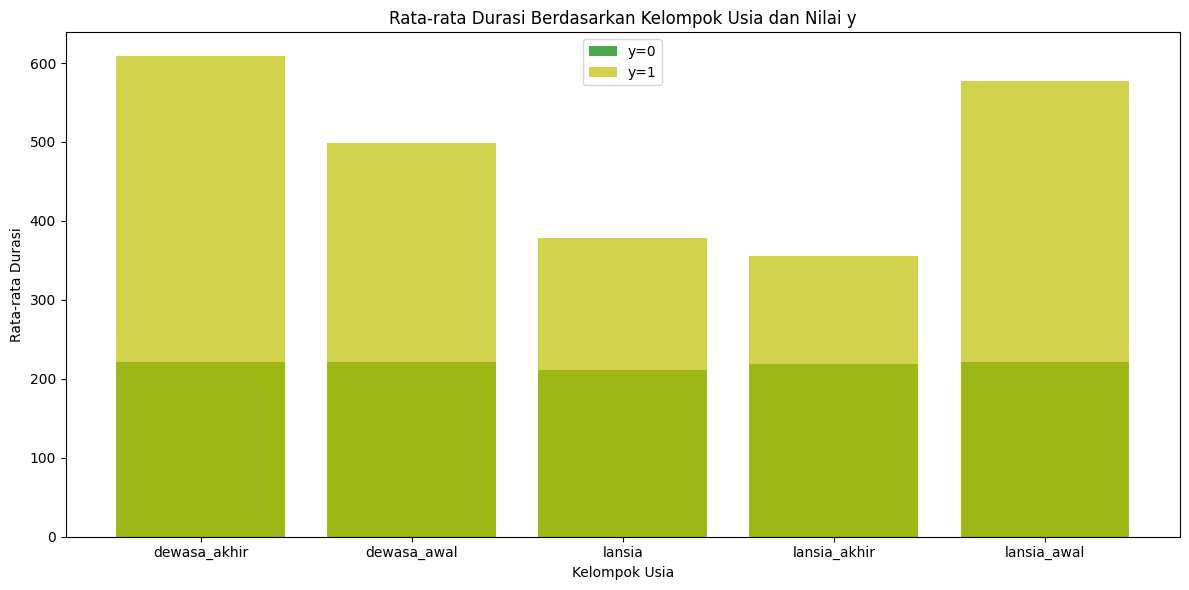

In [12]:

grouped = df.groupby(['kel_usia', 'y'])['duration'].mean().reset_index()


plt.figure(figsize=(12, 6))
barplot = plt.bar(grouped[grouped['y'] == 0]['kel_usia'], grouped[grouped['y'] == 0]['duration'], color='g', alpha=0.7, label='y=0')
barplot = plt.bar(grouped[grouped['y'] == 1]['kel_usia'], grouped[grouped['y'] == 1]['duration'], color='y', alpha=0.7, label='y=1')


plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Durasi')
plt.title('Rata-rata Durasi Berdasarkan Kelompok Usia dan Nilai y')
plt.legend()


plt.tight_layout()
plt.show()

###11. a. Buatlah sebuah dataframe baru bernama 'df_model' yang berisi kolom age, housing, education, loan, euribor3m, dan y
###b. Lakukan encoding untuk kolom housing, education, dan loan
###c. Buatlah dua buah model klasifikasi menggunakan dataframe 'df_model' untuk memprediksi nilai kolom y (boleh memilih mau menggunakan algoritma apa: regresi logistik, SVM, decision tree, random forest, atau XGBoost)

Catatan: jangan lupa untuk membuang kolom kategorikal yang sudah di-encoding pada bagian b. Gunakan kolom y sebagai label atau output klasifikasi.

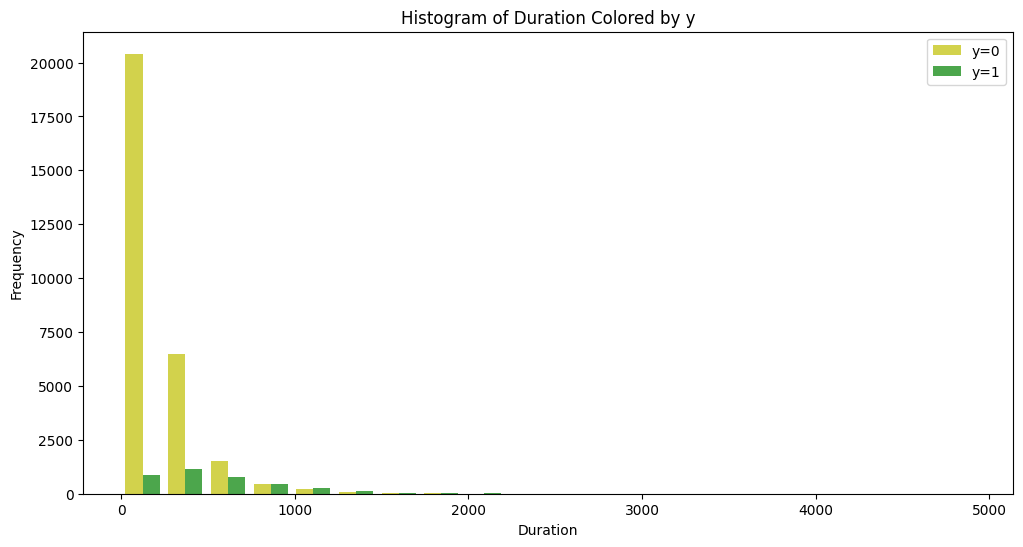

In [13]:
df_model = df.copy()
df_model = df_model[['age', 'housing', 'education', 'loan', 'euribor3m', 'y']]

plt.figure(figsize=(12, 6))
plt.hist([df[df['y'] == 0]['duration'], df[df['y'] == 1]['duration']], bins=20, color=['y', 'g'], alpha=0.7, label=['y=0', 'y=1'])

plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration Colored by y')
plt.legend()

plt.show()